In [23]:
import numpy as np
from matplotlib import pyplot as plt
import os
import pickle
from sklearn.decomposition import PCA
import george
from george import kernels
from scipy.optimize import minimize

In [24]:
import schwimmbad
import emcee
import dynesty.plotting as dyplot
import dynesty.results as dyres
import dynesty.utils as dyfunc
import dynesty
import corner
import time
import sys
from matplotlib import cm


In [25]:
fitdata=np.load("../notebooks/2d_fitdata_714.npy")
beta=fitdata[:,0]
incl=fitdata[:,1]
s=np.sin(0.7)
c=np.cos(0.7)
bix=1-np.cos(((beta*c) + (incl*s/60)-.5)*np.pi/2)
biy=(-beta*s) + (incl*c/60)

w2=fitdata[:,2+2]
yerr=np.array([j*0.01 for j in w2])

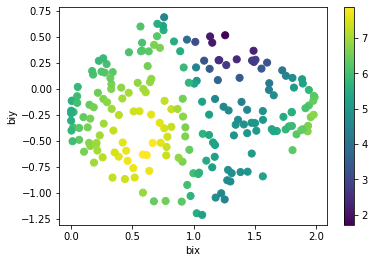

In [26]:
style = dict(cmap='viridis', vmin=np.min(w2), vmax=np.max(w2))
plt.scatter(bix,biy, c=w2, s=50, **style)
plt.xlabel("bix")
plt.ylabel("biy")
plt.colorbar()
plt.show()

In [27]:
x=np.transpose([bix,biy])
kernel = np.var(w2) * kernels.ExpSquaredKernel(0.3**2,ndim=2,axes=0)* kernels.ExpSquaredKernel(0.2**2,ndim=2,axes=1)
gp = george.GP(kernel)
gp.compute(x,yerr)

np.set_printoptions(suppress=True)
print("Initial ln-likelihood: {0:.2f}".format(gp.log_likelihood(w2)))
print(gp.get_parameter_vector())
print(np.sqrt(np.exp(gp.get_parameter_vector())))

Initial ln-likelihood: -4.07
[-0.16446222 -2.40794561 -3.21887582]
[0.92105907 0.3        0.2       ]


In [38]:
ndim = 3

def loglike (p):
    try:        
        gp.set_parameter_vector(p)
        return gp.log_likelihood(w2)
    except:
        return -100000
        

def ptform(u):
    #  [-50,50] [-4.6,-1.4] [-4.6,-1.4]
    return [u[0]*100 -50, u[1]*6-4.6 , u[2]*6-4.6 ]


In [39]:
sampler = dynesty.NestedSampler(loglike, ptform, ndim,nlive=1000, pool=schwimmbad.MultiPool())


In [40]:
t0=time.time()
sampler.run_nested()
print(time.time()-t0)
results = sampler.results

iter: 11584 | +1000 | bound: 14 | nc: 1 | ncall: 56317 | eff(%): 22.345 | loglstar:   -inf < 153.472 <    inf | logz: 141.987 +/-  0.156 | dlogz:  0.001 >  1.009                                     

293.8059141635895


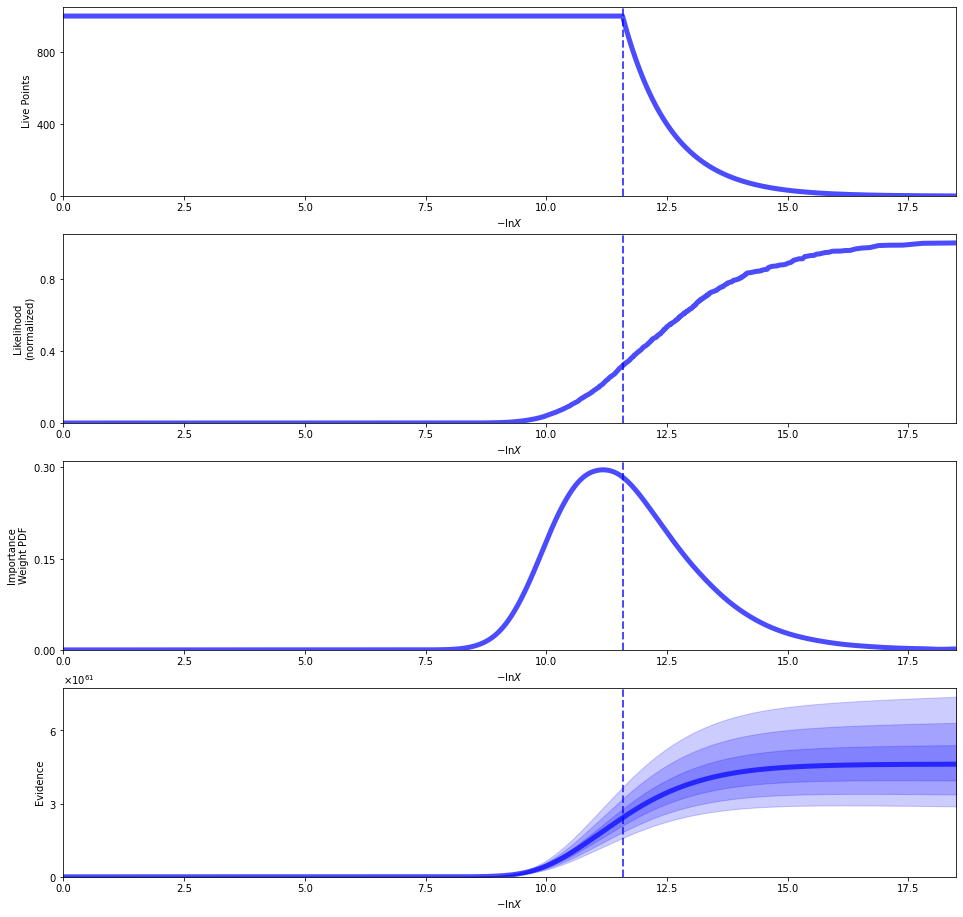

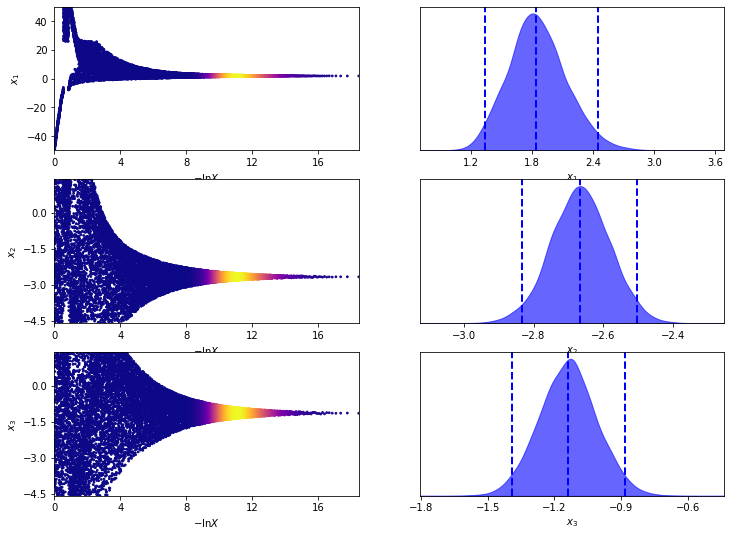

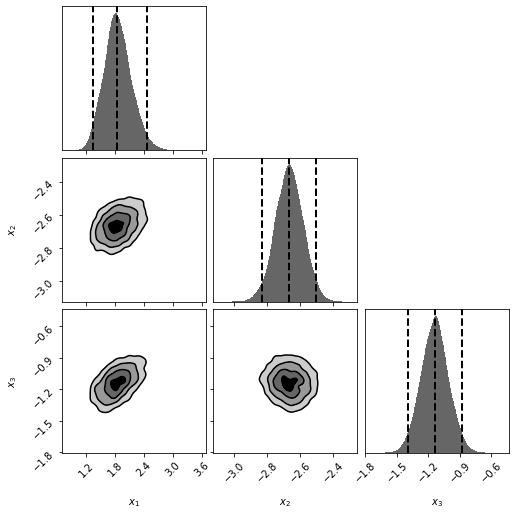

In [41]:
# Plot a summary of the run.
rfig, raxes = dyplot.runplot(results)

# Plot traces and 1-D marginalized posteriors.
tfig, taxes = dyplot.traceplot(results)

# Plot the 2-D marginalized posteriors.
cfig, caxes = dyplot.cornerplot(results)

In [37]:
results.summary()

Summary
nlive: 1000
niter: 11704
ncall: 57057
eff(%): 22.265
logz: 141.854 +/-  0.156
